# Dataset analysis 

In [5]:
import SimpleITK as sitk
import numpy as np
import math
import pandas as pd
import os.path
import re
import matplotlib.pyplot as plt
from typing import List
import seaborn as sns
import json
from matplotlib import cm
from pprint import pformat

import tikzplotlib

from torchvision import transforms
from PIL import Image as Img

from IPython.display import Image 

plt.style.use("seaborn")
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [6]:
base_path_raw = os.path.abspath('/media/jan/DataStorage/ProjectData/temp/dataset_0_contrast_3/xVertSeg_images/image004')
slice_file = os.path.join(base_path_raw, 'slice_017.npy')
image = np.load(slice_file)

print(image.shape)
image = Img.fromarray((image * 255).astype('uint8')).convert('RGB')

(436, 436)


FiveCrop crops:  

0. top left  
1. top right  
2. bottom right  
3. bottom left
4. center

_Important: _ The dimension switch is integrated in the FiveCrop function!

In [7]:
crop_dim = (352, 352)
def get_transform(crop_nr = 1):
    transf_to_image = transforms.Compose([
                    transforms.Lambda(lambda x : transforms.Pad((
                        max(0, math.ceil((crop_dim[1] - x.size[0]) / 2)),
                        max(0, math.ceil((crop_dim[0] - x.size[1]) / 2)) ), fill=0)(x) ),
                    transforms.FiveCrop(crop_dim),
                    transforms.Lambda(lambda crops: crops[crop_nr])])
    transf = transforms.Compose([
                    transforms.Lambda(lambda x : transforms.Pad((
                        max(0, math.ceil((crop_dim[1] - x.size[0]) / 2)),
                        max(0, math.ceil((crop_dim[0] - x.size[1]) / 2)) ), fill=0)(x) ),
                    transforms.FiveCrop(crop_dim),
                    transforms.Lambda(lambda crops: crops[crop_nr]),
                    transforms.ToTensor()])
    return transf_to_image

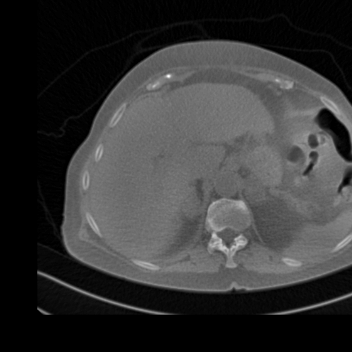

In [8]:
t = list()
for i in range(5):
    t.append(get_transform(i))
display(t[2](image))

<Figure size 720x720 with 0 Axes>

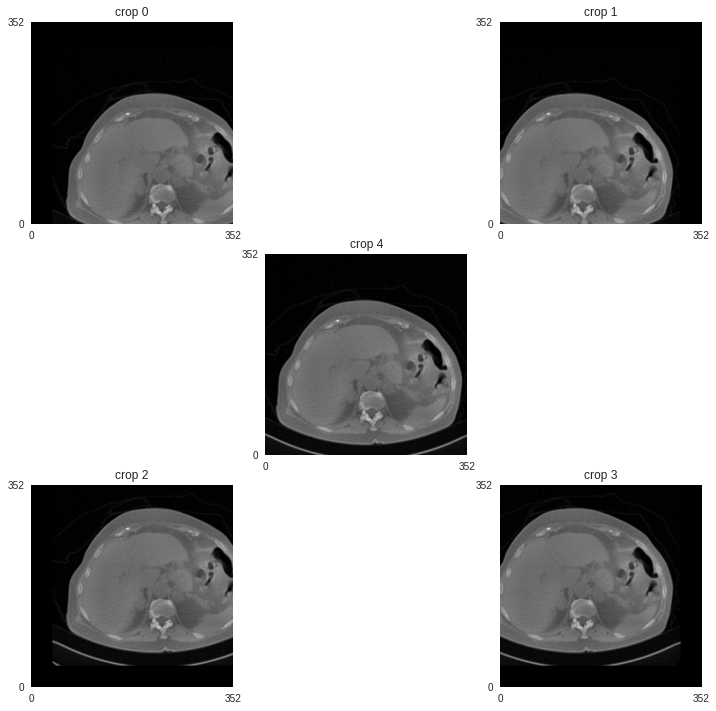

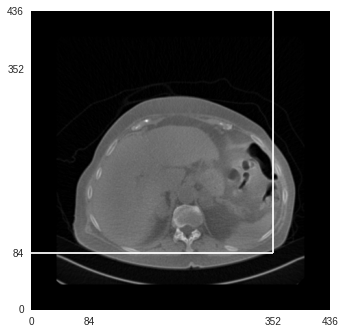

In [9]:
plt.figure(figsize=(10,10))
f, axarr = plt.subplots(3,3, figsize=(10,10))
axarr[0,0].imshow(t[0](image))
axarr[0,0].grid(False)
axarr[0,0].set_title('crop 0')
axarr[0,0].set_yticks(np.linspace(0, t[1](image).size[1]-1, 2))
axarr[0,0].set_xticks(np.linspace(0, t[1](image).size[0]-1, 2))
axarr[0,0].set_xticklabels([0, 352])
axarr[0,0].set_yticklabels([352,0])
axarr[0,1].axis('off')
axarr[0,2].imshow(t[1](image))
axarr[0,2].set_yticks(np.linspace(0, t[1](image).size[1]-1, 2))
axarr[0,2].set_xticks(np.linspace(0, t[1](image).size[0]-1, 2))
axarr[0,2].set_xticklabels([0, 352])
axarr[0,2].set_yticklabels([352,0])
axarr[0,2].grid(False)
axarr[0,2].set_title('crop 1')
axarr[2,0].imshow(t[2](image))
axarr[2,0].grid(False)
axarr[2,0].set_title('crop 2')
axarr[2,0].set_yticks(np.linspace(0, t[1](image).size[1]-1, 2))
axarr[2,0].set_xticks(np.linspace(0, t[1](image).size[0]-1, 2))
axarr[2,0].set_xticklabels([0, 352])
axarr[2,0].set_yticklabels([352,0])
axarr[2,2].imshow(t[3](image))
axarr[2,2].grid(False)
axarr[2,2].set_title('crop 3')
axarr[2,2].set_yticks(np.linspace(0, t[1](image).size[1]-1, 2))
axarr[2,2].set_xticks(np.linspace(0, t[1](image).size[0]-1, 2))
axarr[2,2].set_xticklabels([0, 352])
axarr[2,2].set_yticklabels([352,0])
plt.grid(False)
axarr[1,1].imshow(t[4](image))
axarr[1,1].set_title('crop 4')
axarr[1,1].set_yticks(np.linspace(0, t[1](image).size[1]-1, 2))
axarr[1,1].set_xticks(np.linspace(0, t[1](image).size[0]-1, 2))
axarr[1,1].set_xticklabels([0, 352])
axarr[1,1].set_yticklabels([352,0])
axarr[1,1].grid(False)
axarr[1,0].axis('off')
axarr[1,2].axis('off')
axarr[2,1].axis('off')
plt.tight_layout()
plt.savefig('cropping_slice017.pdf')
plt.figure()
plt.imshow(image)
plt.xticks([0,84, 352,image.size[0]-1], labels = [str(0),str(84),str(352), str(image.size[0])])
plt.yticks([0,84,352, image.size[1]-1], labels = [str(image.size[0]), str(352), str(84), str(0)])
plt.hlines([352], 0, 352, color = 'white')
plt.vlines([352], 0, 352, color = 'white')
plt.grid(False)
#plt.title('Transverse slice 17 from xVertSeg image 1')
plt.savefig('slice017.pdf')

In [10]:
base_path_raw = os.path.abspath('/media/jan/DataStorage/ProjectData/temp/dataset_2_contrast_3/xVertSeg_images/image004')

slice_file = os.path.join(base_path_raw, 'slice_202.npy')
image = np.load(slice_file)
image = image

print(image.shape)
image = Img.fromarray((image * 255).astype('uint8')).convert('RGB')

(219, 436)


<Figure size 720x720 with 0 Axes>

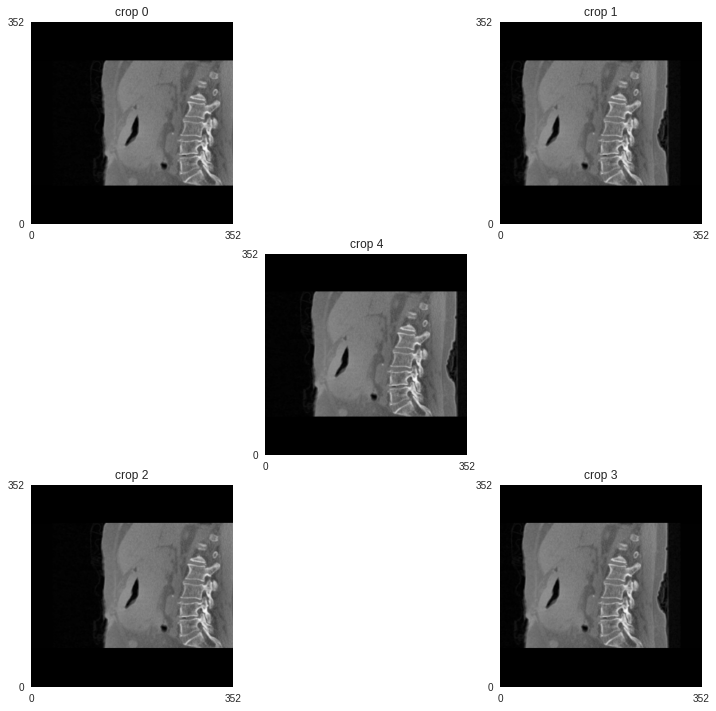

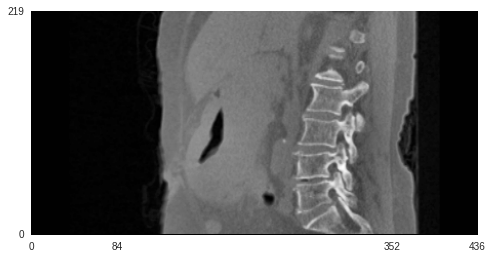

In [11]:

plt.figure(figsize=(10,10))
f, axarr = plt.subplots(3,3, figsize=(10,10))
axarr[0,0].imshow(t[0](image))
axarr[0,0].grid(False)
axarr[0,0].set_title('crop 0')
axarr[0,0].set_yticks(np.linspace(0, t[1](image).size[1]-1, 2))
axarr[0,0].set_xticks(np.linspace(0, t[1](image).size[0]-1, 2))
axarr[0,0].set_xticklabels([0, 352])
axarr[0,0].set_yticklabels([352,0])
axarr[0,1].axis('off')
axarr[0,2].imshow(t[1](image))
axarr[0,2].grid(False)
axarr[0,2].set_title('crop 1')
axarr[0,2].set_yticks(np.linspace(0, t[1](image).size[1]-1, 2))
axarr[0,2].set_xticks(np.linspace(0, t[1](image).size[0]-1, 2))
axarr[0,2].set_xticklabels([0, 352])
axarr[0,2].set_yticklabels([352,0])
axarr[2,0].imshow(t[2](image))
axarr[2,0].grid(False)
axarr[2,0].set_title('crop 2')
axarr[2,0].set_yticks(np.linspace(0, t[1](image).size[1]-1, 2))
axarr[2,0].set_xticks(np.linspace(0, t[1](image).size[0]-1, 2))
axarr[2,0].set_xticklabels([0, 352])
axarr[2,0].set_yticklabels([352,0])
axarr[2,2].imshow(t[3](image))
axarr[2,2].grid(False)
axarr[2,2].set_title('crop 3')
axarr[2,2].set_yticks(np.linspace(0, t[1](image).size[1]-1, 2))
axarr[2,2].set_xticks(np.linspace(0, t[1](image).size[0]-1, 2))
axarr[2,2].set_xticklabels([0, 352])
axarr[2,2].set_yticklabels([352,0])
plt.grid(False)
axarr[1,1].imshow(t[4](image))
axarr[1,1].set_title('crop 4')
axarr[1,1].set_yticks(np.linspace(0, t[1](image).size[1]-1, 2))
axarr[1,1].set_xticks(np.linspace(0, t[1](image).size[0]-1, 2))
axarr[1,1].set_xticklabels([0, 352])
axarr[1,1].set_yticklabels([352,0])
axarr[1,1].grid(False)
axarr[1,0].axis('off')
axarr[1,2].axis('off')
axarr[2,1].axis('off')
plt.tight_layout()
plt.savefig('cropping_slice202.pdf')
plt.figure()
plt.imshow(image)
plt.grid(False)
#plt.title('Sagittal slice 202 from xVertSeg image 2')
plt.xticks([0,84, 352,image.size[0]-1], labels = [str(0),str(84),str(352), str(image.size[0])])
plt.yticks([0,image.size[1]-1], labels = [str(image.size[1]),str(0)])
plt.savefig('slice202.pdf')